In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
#Column descriptions for reference
#id - unique identified for a house
#dateDate - house was sold
#pricePrice - is prediction target
#bedroomsNumber - of Bedrooms/House
#bathroomsNumber - of bathrooms/bedrooms
#sqft_livingsquare - footage of the home
#sqft_lotsquare - footage of the lot
#floorsTotal - floors (levels) in house
#waterfront - House which has a view to a waterfront
#view - Has been viewed/ how many times viewed?
#condition - How good the condition is ( Overall )
#grade - overall grade given to the housing unit, based on King County grading system
#sqft_above - square footage of house apart from basement
#sqft_basement - square footage of the basement
#yr_built - Built Year
#yr_renovated - Year when house was renovated
#zipcode - zip
#lat - Latitude coordinate
#long - Longitude coordinate
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Looking at the dataset ##

In [10]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [12]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looking to see which will become my variables. First dropping any null data since it doesn't seem to affect the data frame. Then looking at other columns and seeing how they fit.####

In [13]:
data = data.dropna()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [25]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
condition        0
grade            0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


In [18]:
display(data['waterfront'].value_counts())
display(data['view'].value_counts())
display(data['sqft_basement'].value_counts())
display(data['yr_renovated'].value_counts())

0.0    15642
1.0      120
Name: waterfront, dtype: int64

0.0    14241
2.0      688
3.0      348
1.0      245
4.0      240
Name: view, dtype: int64

0.0       9362
?          333
600.0      155
500.0      151
700.0      148
          ... 
248.0        1
602.0        1
2090.0       1
1920.0       1
2190.0       1
Name: sqft_basement, Length: 283, dtype: int64

0.0       15111
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1974.0        1
1959.0        1
1934.0        1
1944.0        1
1976.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
data = data.drop(columns =['waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,1951,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,3,11,2001,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,3,7,1995,98003,47.3097,-122.327,2238,6819


In [32]:
#sorting by date
data = data.sort_values(by = 'date', ascending =False)
display(data.head())
display(data.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
4542,7201800300,9/9/2014,397500.0,3,1.75,1300,8480,1.0,3,7,1969,98052,47.6991,-122.130,1740,7280
12827,1245500276,9/9/2014,718000.0,3,2.50,2070,7200,2.0,3,8,2001,98033,47.6946,-122.211,1650,8877
4486,2726059100,9/9/2014,950000.0,4,3.00,2980,44431,2.0,2,10,1981,98034,47.7154,-122.161,2010,7332
3240,7334501250,9/9/2014,325000.0,3,2.50,1870,9825,1.0,4,7,1994,98045,47.4639,-121.744,1380,11475
13684,3343301490,9/9/2014,818500.0,5,3.50,4790,12957,2.0,3,9,2005,98006,47.5469,-122.194,2620,13538


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
14571,6672900220,1/12/2015,984000.0,4,2.25,2390,12292,1.0,5,9,1962,98040,47.5528,-122.221,2870,12337
2479,7186800105,1/12/2015,236500.0,4,1.00,2140,4217,1.5,3,6,1925,98118,47.5484,-122.287,1720,5413
5813,7436050170,1/12/2015,338500.0,4,2.50,2390,6111,2.0,3,8,1997,98030,47.3677,-122.173,2520,6500
15511,8851500050,1/12/2015,262000.0,4,1.50,1840,9009,2.0,3,7,1965,98198,47.4060,-122.318,1390,8025
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,4,8,2002,98042,47.3922,-122.165,1920,5288


In [ ]:
# Looking at the table a bit more clearly now. 
# Planning on what plots I can look at to see how I can interpret the data.

# order dates 
# see how recent dates are/how many years, difference of info per year
# price vs bedrooms - fix xticks to reduce number 
# price vs zipcode 
# zipcode vs bedrooms
# price vs sqft
# price vs yr_built
# price vs condition

In [58]:
data['date'] = pd.to_datetime(data['date'])

In [61]:
data_2014 = data[(data['date'] <= "2015") & (data['date'] >= "2014")]
display(data_2014.head())
display(data_2014.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
4542,7201800300,2014-09-09,397500.0,3,1.75,1300,8480,1.0,3,7,1969,98052,47.6991,-122.130,1740,7280
12827,1245500276,2014-09-09,718000.0,3,2.50,2070,7200,2.0,3,8,2001,98033,47.6946,-122.211,1650,8877
4486,2726059100,2014-09-09,950000.0,4,3.00,2980,44431,2.0,2,10,1981,98034,47.7154,-122.161,2010,7332
3240,7334501250,2014-09-09,325000.0,3,2.50,1870,9825,1.0,4,7,1994,98045,47.4639,-121.744,1380,11475
13684,3343301490,2014-09-09,818500.0,5,3.50,4790,12957,2.0,3,9,2005,98006,47.5469,-122.194,2620,13538


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 4542 to 19996
Data columns (total 16 columns):
id               10695 non-null int64
date             10695 non-null datetime64[ns]
price            10695 non-null float64
bedrooms         10695 non-null int64
bathrooms        10695 non-null float64
sqft_living      10695 non-null int64
sqft_lot         10695 non-null int64
floors           10695 non-null float64
condition        10695 non-null int64
grade            10695 non-null int64
yr_built         10695 non-null int64
zipcode          10695 non-null int64
lat              10695 non-null float64
long             10695 non-null float64
sqft_living15    10695 non-null int64
sqft_lot15       10695 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 1.4 MB


None

In [62]:
data_2015 = data[(data['date'] >= "2015")]
display(data_2015.head())
display(data_2015.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
10822,871000435,2015-05-09,812000.0,4,2.00,2380,6122,1.0,4,8,1949,98199,47.6506,-122.405,1810,5202
6796,7429000130,2015-05-09,515000.0,4,2.50,2980,12534,2.0,3,9,1996,98031,47.3999,-122.211,2630,12534
13241,2493200325,2015-05-09,589500.0,4,1.50,1440,3200,1.0,4,7,1960,98136,47.5269,-122.383,1650,6400
552,4025300135,2015-05-08,451000.0,3,1.75,1790,9813,2.0,3,7,1949,98155,47.7490,-122.305,1520,10125
10435,1118000320,2015-05-08,3400000.0,4,4.00,4260,11765,2.0,3,11,1939,98112,47.6380,-122.288,4260,10408


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5067 entries, 10822 to 12076
Data columns (total 16 columns):
id               5067 non-null int64
date             5067 non-null datetime64[ns]
price            5067 non-null float64
bedrooms         5067 non-null int64
bathrooms        5067 non-null float64
sqft_living      5067 non-null int64
sqft_lot         5067 non-null int64
floors           5067 non-null float64
condition        5067 non-null int64
grade            5067 non-null int64
yr_built         5067 non-null int64
zipcode          5067 non-null int64
lat              5067 non-null float64
long             5067 non-null float64
sqft_living15    5067 non-null int64
sqft_lot15       5067 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(10)
memory usage: 673.0 KB


None

In [80]:
data_2015['yr_built'].unique()

array([1949, 1996, 1960, 1939, 1955, 1968, 1962, 1950, 1965, 1978, 2006,
       1958, 1976, 1975, 1951, 2008, 1910, 1986, 1990, 1957, 1953, 1905,
       1931, 1916, 2012, 2010, 1967, 1940, 1997, 1971, 2000, 1927, 1929,
       1979, 1998, 2003, 1920, 1959, 1989, 1966, 1952, 1937, 2007, 1982,
       1914, 1983, 2011, 1973, 1963, 1992, 1948, 2002, 1987, 1901, 1977,
       1984, 1943, 2001, 1981, 1918, 1964, 1972, 1995, 1994, 1925, 1991,
       1919, 1970, 2014, 1947, 1956, 2004, 1938, 1999, 1980, 1954, 1913,
       2015, 1941, 1944, 1924, 1933, 1917, 1915, 1942, 2005, 1908, 1988,
       1945, 1926, 1911, 2013, 1936, 1946, 1922, 2009, 1969, 1985, 1923,
       1900, 1906, 1974, 1907, 1909, 1904, 1912, 1961, 1903, 1934, 1932,
       1930, 1928, 1902, 1993, 1921, 1935], dtype=int64)

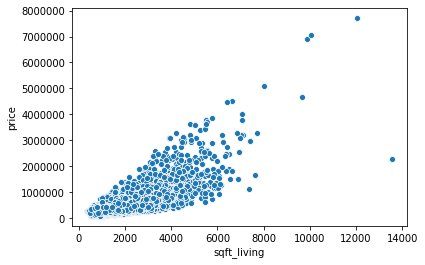

In [77]:
price_sqft_2014 = sns.scatterplot(data=data_2014, x='sqft_living', y='price')

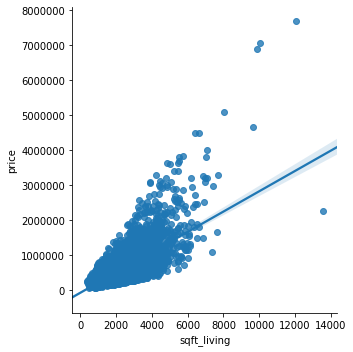

In [82]:
price_sqft_2014 = sns.lmplot(data=data_2014, x='sqft_living', y='price')

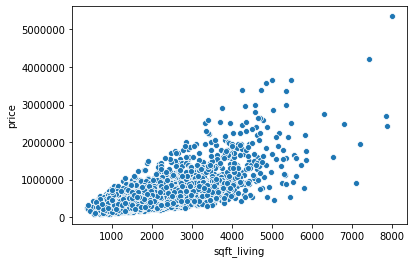

In [70]:
price_sqft_2015 = sns.scatterplot(data=data_2015, x='sqft_living', y='price')

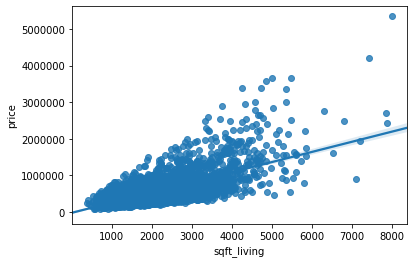

In [78]:
price_sqft_2015 = sns.regplot(data=data_2015, x='sqft_living', y='price')